In [1]:
%pylab inline 
import pandas
import seaborn 

Populating the interactive namespace from numpy and matplotlib


# Load CSV into Memory 

data = pandas.read_csv('Downloads/uber-raw-data-apr14.txt') 
data.tail()

# Convert Column to Datetime and Add Columns 

In [9]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [7]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


In [10]:
def get_dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(get_dom)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [16]:
def get_weekday(dt): 
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt): 
    return dt.hour

data['hour'] = data['Date/Time'].map(get_hour)

data.tail()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# Analysis by Day

Text(0.5, 1.0, 'Frequency of DoM in Uber Data - April 2014')

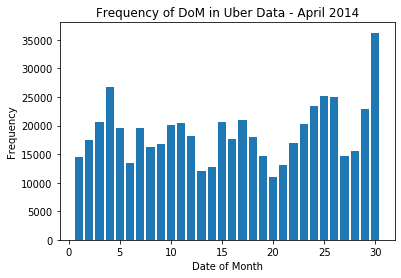

In [23]:
hist(data.dom, bins = 30, rwidth = .8, range=(0.5, 30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency of Rides Per DoM in Uber Data - April 2014')

In [31]:
#for k, rows in data.groupby('dom'): 
#    print((k,rows))

def count_rows(rows): 
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

<BarContainer object of 30 artists>

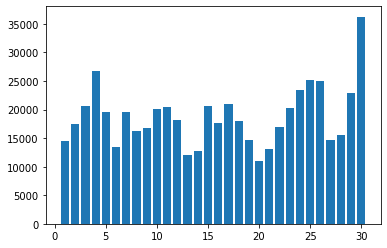

In [33]:
bar(range(1,31), by_date)

In [34]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

([<matplotlib.axis.XTick at 0x1a2832c0f0>,
 <a list of 30 Text xticklabel objects>)

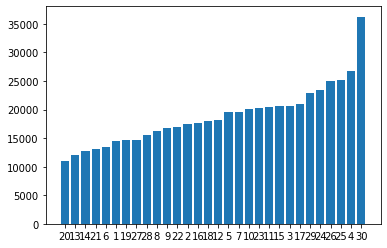

In [36]:
bar(range(1,31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index); 
xlabel('Date of Month')
ylabel('Frequency')
title('Frequency of Rides Per DoM in Uber Data - April 2014')

# Analysis by Hour

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

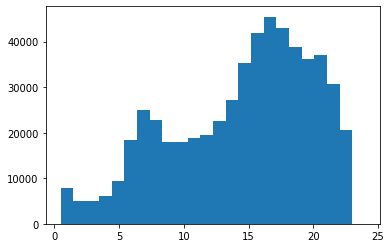

In [37]:
hist(data.hour, bins = 24, range=(0.5, 24))

# Analysis by Weekday 

([<matplotlib.axis.XTick at 0x1a286e2438>,
 <a list of 7 Text xticklabel objects>)

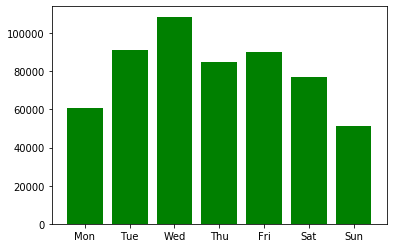

In [41]:
hist(data.weekday, bins = 7, range = [-.5, 6.5], rwidth=0.8, color='green')
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun '.split())

# Cross-Analysis by Hour and Day of Week 

In [48]:
by_cross = data.groupby('weekday hour'.split()).apply(count_rows).unstack()

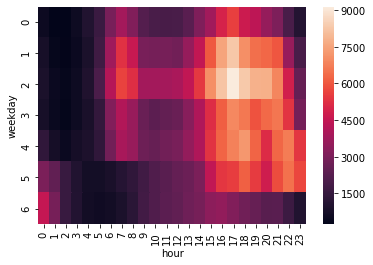

In [50]:
seaborn.heatmap(by_cross)

# Analysis by Latitude and Longitude 

''

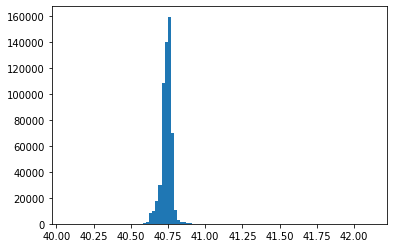

In [52]:
hist(data['Lat'], bins=100, range(40.5, 41))
; 

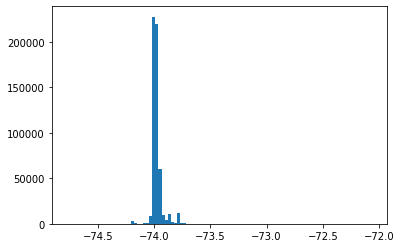

In [53]:
hist(data['Lon'], bins=100);

No handles with labels found to put in legend.


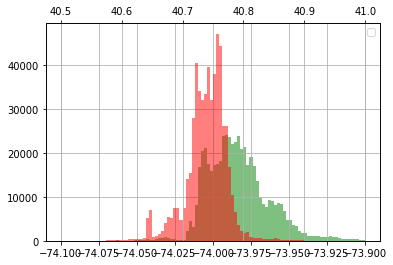

In [60]:
hist(data['Lon'], bins=100, range = (-74.1, -73.9), color = 'g', alpha = .5); 
grid()
twiny()
hist(data['Lat'], bins=100, range = (40.5, 41), color='r', alpha = 0.5); 
grid()
legend()

# Outline of Manhattan, NY

(40.7, 41)

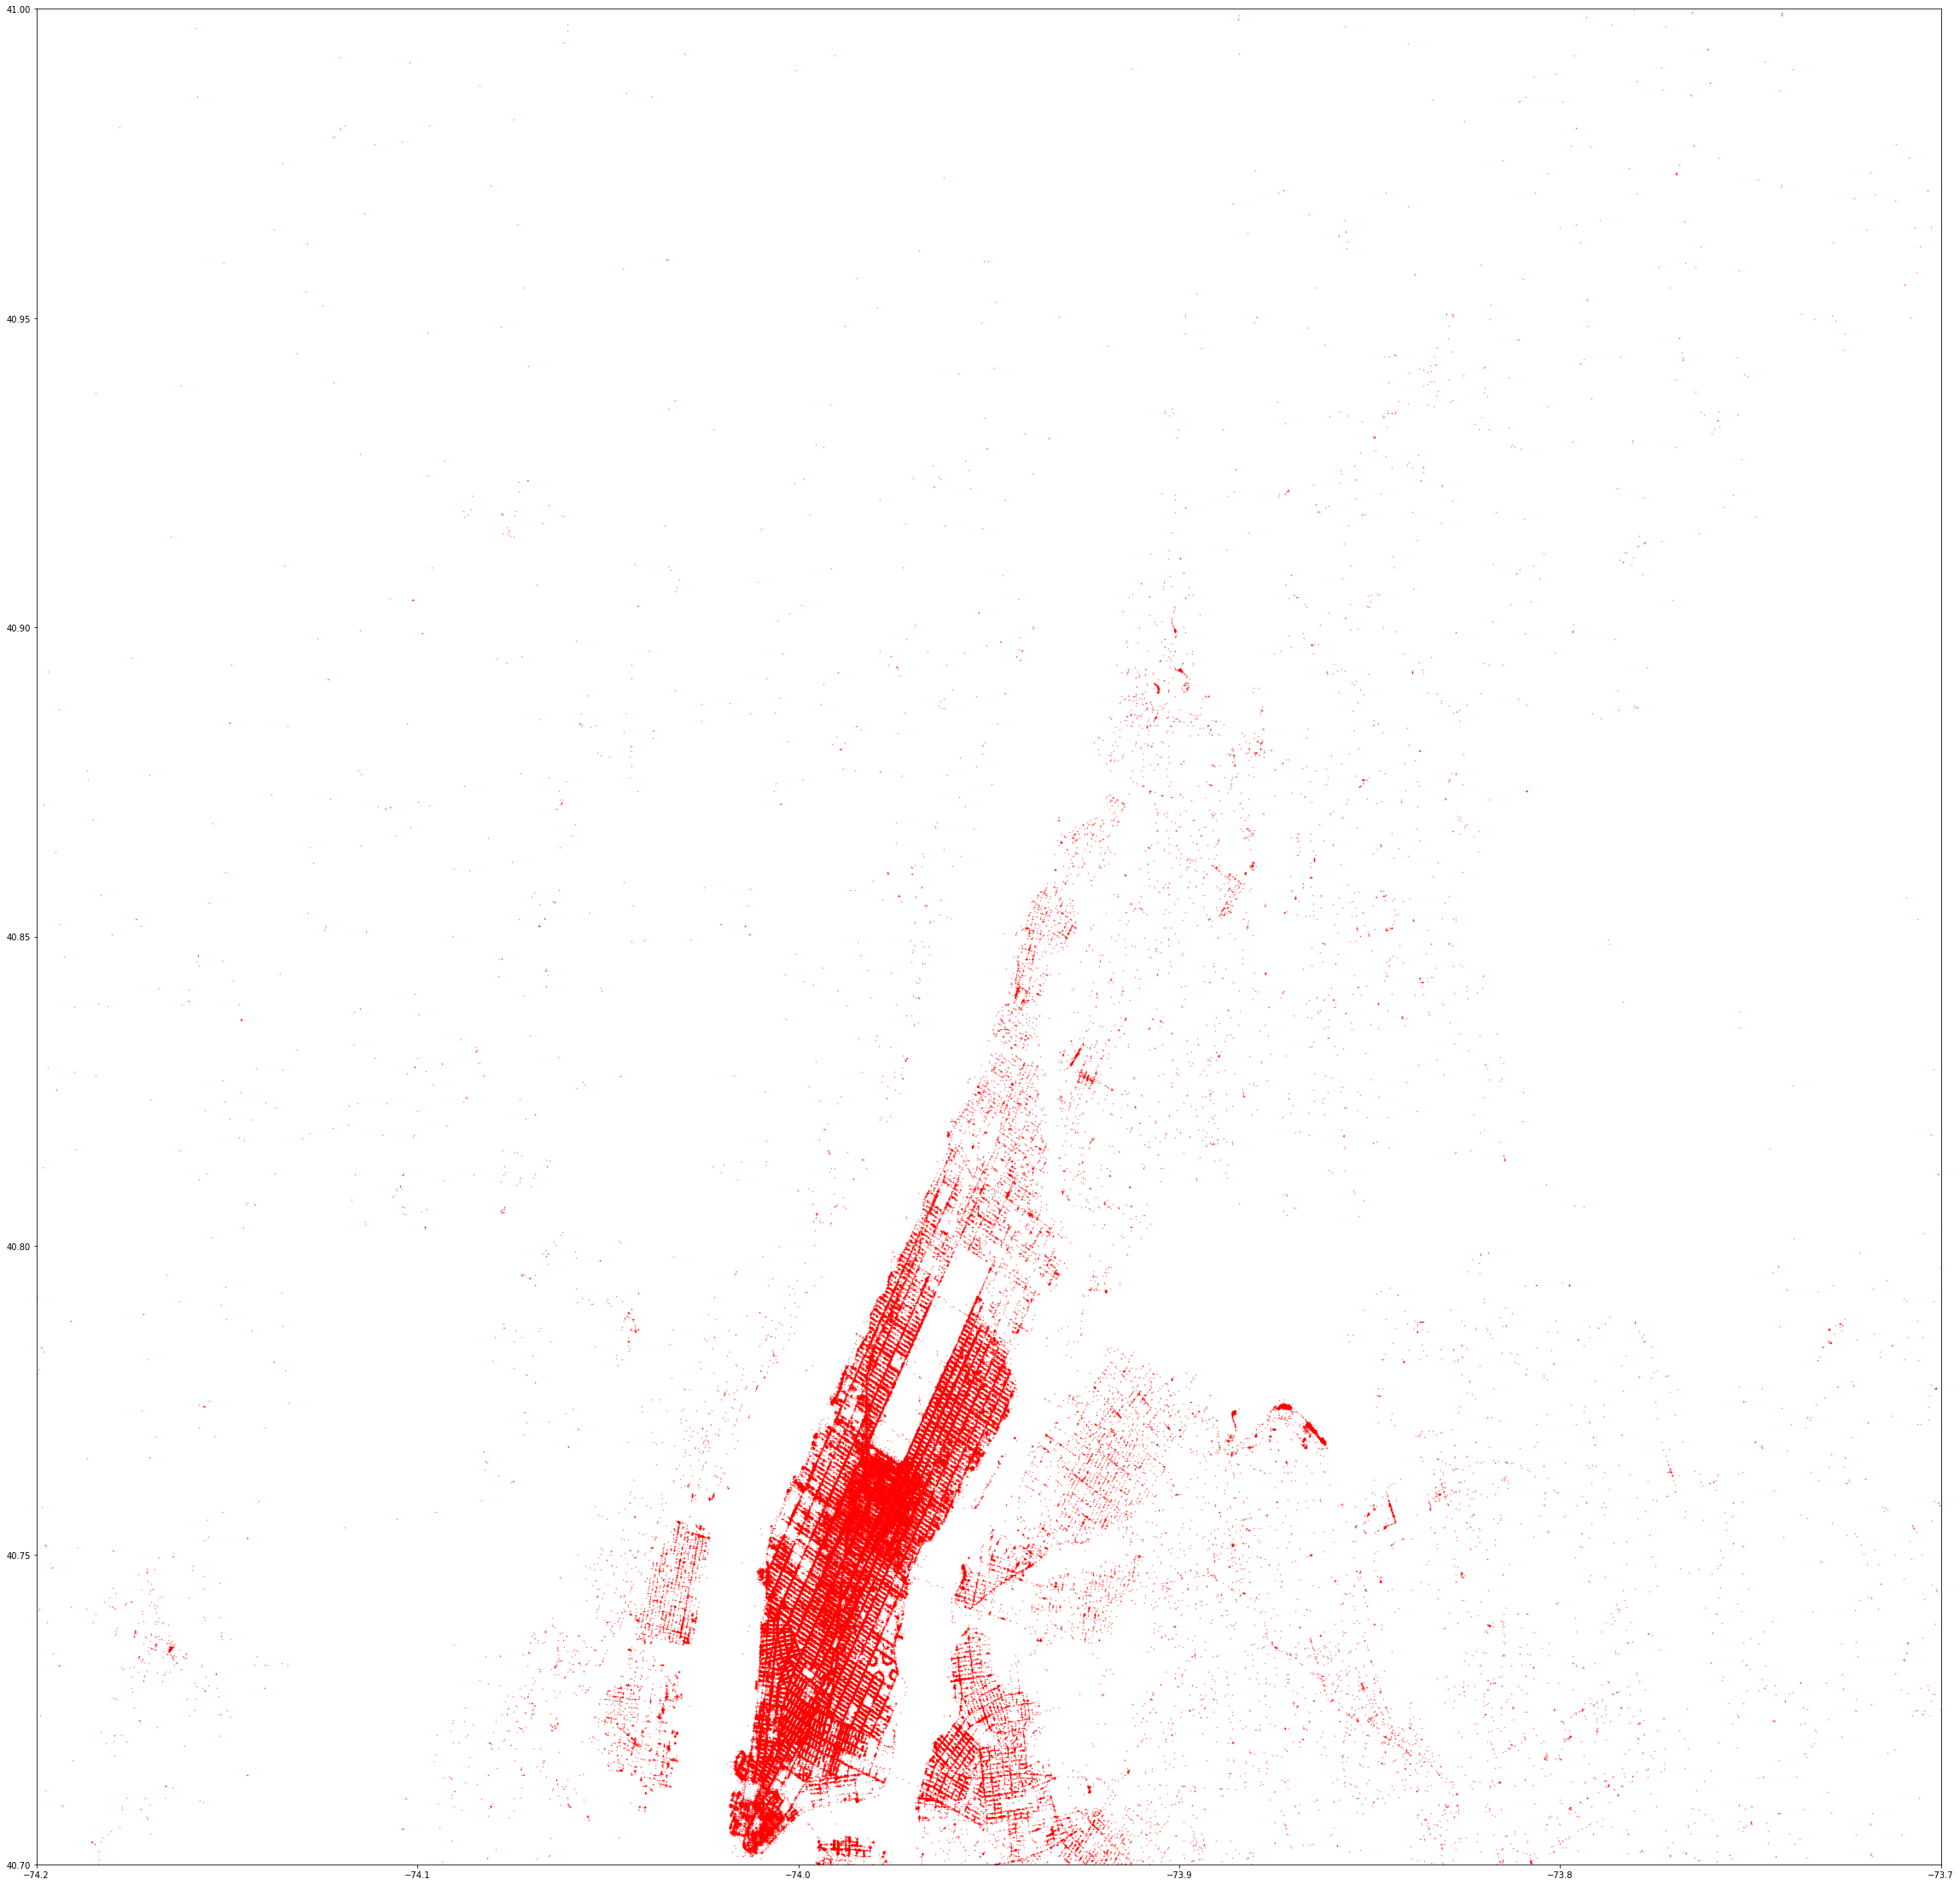

In [73]:
figure(figsize=[40, 40])
plot(data['Lon'], data['Lat'],'.', ms = 1, color = 'r', alpha = .5 )
xlim(-74.2, -73.7)
ylim(40.7, 41)